### Notes: 
* Check for Normal Distribution -  StandardScaler
* Outliers -choose SVC, Decision Tree or Random Forest
* Correlation between features - remove flavor 
* Correlation between any features and label
* Imbalanced Dataset - SMOTE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Cleaning

In [2]:
# Reading merged data Arabica 98% and Robusta 2% of records
df_quality = pd.read_csv("data/merged_data_cleaned.csv")
df_quality.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [3]:
################### Quality Measures - Features ####################
# Aroma
# Flavor
# Aftertaste
# Acidity
# Body
# Balance
# Uniformity
# Cup Cleanliness
# Sweetness
# Moisture
# Defects
################### Bean Metadata - Labels ####################
# Species (arabica / robusta)

df_quality = df_quality[['Species', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 
                         'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
                         'Moisture', 'Category.One.Defects', 'Category.Two.Defects']]

In [4]:
# check for null values in data
df_quality.isnull().sum()

Species                 0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Moisture                0
Category.One.Defects    0
Category.Two.Defects    0
dtype: int64

In [5]:
# Data summary
df_quality.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Category.One.Defects,Category.Two.Defects
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,0.088379,0.479462,3.556385
std,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.048287,2.549683,5.312541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,0.090000,0.000000,0.000000
50%,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,0.110000,0.000000,2.000000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,0.120000,0.000000,4.000000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,0.280000,63.000000,55.000000


C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Uniformity', ylabel='Density'>

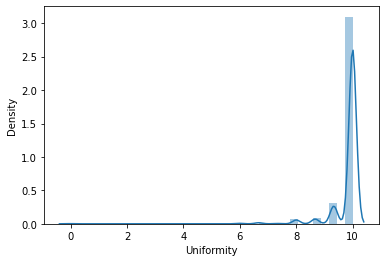

In [6]:
# Checking for Gaussian distribution in data
fig = plt.figure()
fig.patch.set_facecolor('white')
sns.distplot(df_quality['Uniformity'])

Data is not fully normaly distributed. There is skewness. Algorithms will perform better with a normalized or scaled dataset.

C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Moisture', ylabel='Density'>

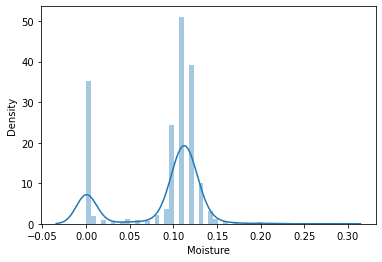

In [7]:
fig = plt.figure()
fig.patch.set_facecolor('white')
sns.distplot(df_quality['Moisture'])

In [8]:
# Checking for Outliers
upper_bound = df_quality['Moisture'].mean() + (1.5 * df_quality['Moisture'].std())
lower_bound = df_quality['Moisture'].mean() - (1.5 * df_quality['Moisture'].std())
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
df_quality.loc[df_quality['Moisture'] > upper_bound]
# df_quality.loc[df_quality['Moisture'] > upper_bound),'Moisture']='0.23'

Lower Bound: 0.015948231896952686
Upper Bound: 0.16081054330842445


,Species,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Category.One.Defects,Category.Two.Defects
124,Arabica,7.83,7.58,7.58,7.83,7.75,7.67,10.00,10.00,10.0,0.18,0,2
143,Arabica,7.42,7.75,7.75,8.00,8.00,7.92,10.00,10.00,10.0,0.20,0,3
178,Arabica,7.50,7.75,7.83,7.92,7.92,7.75,10.00,10.00,10.0,0.20,0,2
526,Arabica,7.33,7.67,7.58,7.50,7.75,7.67,10.00,10.00,10.0,0.28,0,0
632,Arabica,7.50,7.42,7.33,7.33,7.67,7.83,10.00,10.00,10.0,0.21,0,2
755,Arabica,7.17,7.25,7.58,7.25,7.58,7.67,10.00,10.00,10.0,0.22,0,2
908,Arabica,7.33,7.33,7.17,7.50,7.58,7.33,10.00,10.00,10.0,0.20,0,0
1059,Arabica,7.17,7.25,7.08,7.42,7.08,7.42,10.00,10.00,10.0,0.18,0,2
1082,Arabica,7.25,7.08,7.25,7.17,7.33,7.17,10.00,10.00,10.0,0.17,0,14
1168,Arabica,7.08,7.00,6.83,7.33,7.25,7.00,10.00,10.00,10.0,0.17,1,19


There are outliers in data, so better to select Models which are insensitive to outliers like SVC, Decision Tree, and Ensembling Techniques

### Dummy Encoding Species to check if Species has correlation to any other feature columns

In [9]:
df_quality_corr = df_quality.copy()
df_quality_corr['Species'] = pd.get_dummies(df_quality_corr['Species'], drop_first=True)
df_quality_corr.head()

,Species,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Category.One.Defects,Category.Two.Defects
0,0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,0.12,0,0
1,0,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,0.12,0,1
2,0,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,0.00,0,0
3,0,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,0.11,0,2
4,0,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,0.12,0,2


<AxesSubplot:>

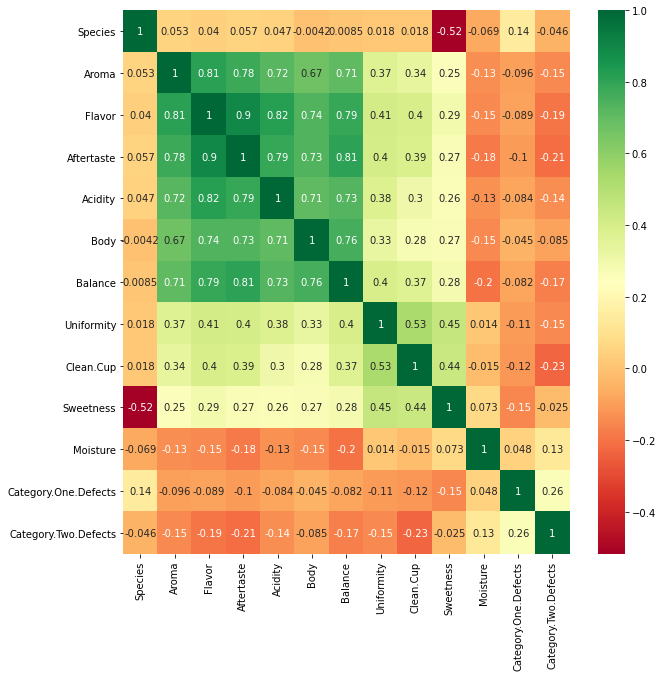

In [10]:
# correlation matrix
corr_mat = df_quality_corr.corr()
top_corr_features = corr_mat.index
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')
# heatmap
sns.heatmap(df_quality_corr[top_corr_features].corr(), annot=True, cmap="RdYlGn")

* From the Correlation heatmap we can see our Label Species is not much correlated to any of the Features.
* Also Flavor column is highly correlated to many other features.

 So we can remove that feature from training the model. It improved overall accuracy by 2%. 
 
 But after SMOTE it doesn't matter

In [11]:
df_quality.drop('Flavor', axis = 1, inplace = True) 
df_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               1339 non-null   object 
 1   Aroma                 1339 non-null   float64
 2   Aftertaste            1339 non-null   float64
 3   Acidity               1339 non-null   float64
 4   Body                  1339 non-null   float64
 5   Balance               1339 non-null   float64
 6   Uniformity            1339 non-null   float64
 7   Clean.Cup             1339 non-null   float64
 8   Sweetness             1339 non-null   float64
 9   Moisture              1339 non-null   float64
 10  Category.One.Defects  1339 non-null   int64  
 11  Category.Two.Defects  1339 non-null   int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 125.7+ KB


## Select your features (columns)

In [12]:
# Set features. This will also be used as your x values.
data = df_quality.values
X = data[:, 1:12]
y = data[:, 0]
print(X.shape, y.shape)

(1339, 11) (1339,)


## Pre-processing
Scale and Normalize the data using the StandardScaler

## Creating Train Test Split on Original Data

In [13]:
# Creating train test split on oversampled data
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=13, test_size=0.2)

In [14]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train_full)

# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train_full)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
X_test_scaled[0]

array([-0.35629753, -0.93837254, -0.91323013,  0.42051079, -0.79855296,
       -1.92637969, -0.60947772, -0.79704048,  0.24761759,  0.18670879,
       -0.11363462])

In [16]:
X_test

array([[7.42, 7.0, 7.17, ..., 0.1, 1, 3],
       [7.17, 6.92, 7.25, ..., 0.12, 1, 7],
       [7.92, 7.83, 7.58, ..., 0.08, 0, 0],
       ...,
       [7.67, 7.58, 7.42, ..., 0.12, 0, 1],
       [7.92, 7.83, 8.08, ..., 0.1, 0, 3],
       [7.83, 7.83, 8.0, ..., 0.0, 1, 1]], dtype=object)

#### Imbalanced Dataset
##### Synthethetic Minority Over sampling Technique (SMOTE)

In [17]:
# Checking for imbalanced Dataset
df_quality['Species'].value_counts()

Arabica    1311
Robusta      28
Name: Species, dtype: int64

In [18]:
# Over sampling to a higher number of records for both Species
from imblearn.over_sampling import SMOTE

synth = SMOTE(random_state=13, sampling_strategy={"Arabica":1500, "Robusta":1500})
X_resampled, y_resampled = synth.fit_resample(X_train_scaled, y_train_full)

C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (1500) in class Arabica will be larger than the number of samples in the majority class (class #Arabica -> 1049)
  n_samples_majority,
C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (1500) in class Robusta will be larger than the number of samples in the majority class (class #Arabica -> 1049)
  n_samples_majority,


In [19]:
from collections import Counter
print("Before SMOTE count:" , Counter(y_train_full))
print("After SMOTE count:" , Counter(y_resampled))

Before SMOTE count: Counter({'Arabica': 1049, 'Robusta': 22})
After SMOTE count: Counter({'Arabica': 1500, 'Robusta': 1500})


## Creating Train and  Validation Set After SMOTE

In [20]:
# Creating train test split on oversampled data
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, random_state=13, test_size=0.3)

# Train the Model using SVC

In [21]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_val, y_val)}")

Training Data Score: 0.9971428571428571
Testing Data Score: 0.9944444444444445


## Evaluate the Model using Confusion Matrix

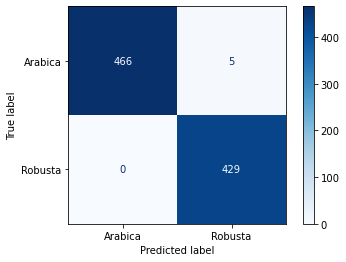

In [22]:
# Make predictions with the model
predictions = model.predict(X_val)  

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_val, y_val, cmap=plt.cm.Blues)

# Decision Tree Model

In [23]:
from sklearn import tree

# Create and score a decision tree classifier
clfTree = tree.DecisionTreeClassifier(min_samples_split=4)
clf = clfTree.fit(X_train, y_train)

# Make predictions with the hypertuned model
treePredictions = clf.predict(X_val)  
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_val, treePredictions,
                            target_names=["Arabica", "Robusta"]))

              precision    recall  f1-score   support

     Arabica       1.00      1.00      1.00       471
     Robusta       1.00      1.00      1.00       429

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [24]:
print(f"Training Data Score: {clf.score(X_train, y_train)}")
print(f"Validation Data Score: {clf.score(X_val, y_val)}")
# Confusion matrix
pd.crosstab(y_val,treePredictions)

Training Data Score: 1.0
Validation Data Score: 0.9988888888888889


col_0,Arabica,Robusta
row_0,,
Arabica,470,1
Robusta,0,429


In [25]:
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")
df = pd.DataFrame({"Prediction": clf.predict(X_test_scaled), "Actual": y_test}).reset_index(drop=True)
df.loc[df['Actual'] == "Robusta"]

Testing Data Score: 1.0


,Prediction,Actual
15,Robusta,Robusta
31,Robusta,Robusta
60,Robusta,Robusta
125,Robusta,Robusta
205,Robusta,Robusta
229,Robusta,Robusta


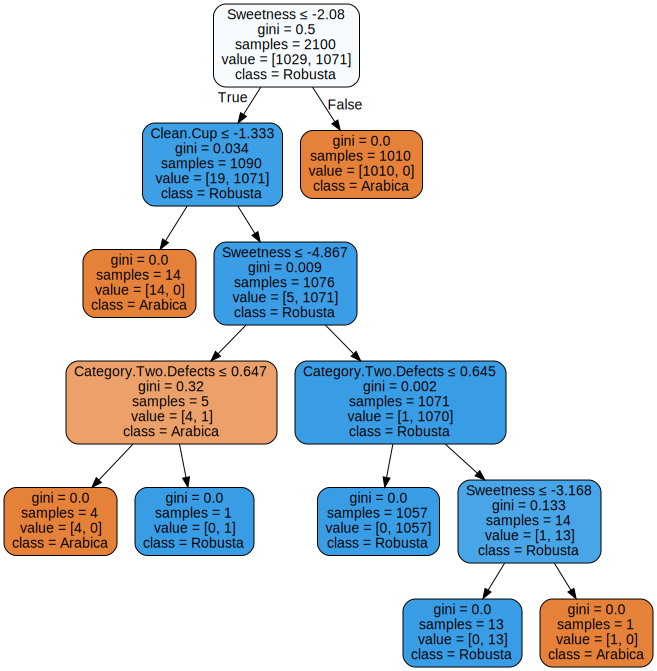

In [26]:
# Create a decision tree graph
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=df_quality.iloc[:, 1:12].columns,  
    class_names=df_quality.Species.unique(),  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Images/coffee_quality_species.png')

graph = graphviz.Source(dot_data)  
graph 

The Decision Tree model gives 100% accuracy after SMOTE even if we increase the test size to 50% at Train Test Split. 

## Save the Decision Tree Classification Model 

In [27]:
import joblib
joblib.dump(clf, 'models/model_species.sav')

['models/model_species.sav']

In [28]:
joblib.dump(X_scaler, 'models/model_species_scaler.sav')

['models/model_species_scaler.sav']